## Plot CO2 Fluxes (Map and Hovmoller)


In [24]:
# see /home/vbennington/LDEO_HPD/hpd_hist_flux.ipynb for all version of hovmoller plots

In [1]:
import datetime
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'jpeg'
%config InlineBackend.print_figure_kwargs = {'dpi':600}

In [2]:
recon_output_dir = f'/data/artemis/workspace/vbennington/LDEO_HPD/models/XGB/GCB_2021/reconstructions'

models = ['cesm_fgco2_1x1_A','fesom2_fgco2_1x1_A','mpi_fgco2_1x1_A','cnrm_fgco2_1x1_A','ipsl_fgco2_1x1_A','planktom_fgco2_1x1_A',
               'noresm_fgco2_1x1_A','princeton_fgco2_1x1_A',]
modname = ['cesm','fesom2','mpi','cnrm','ipsl','planktom','noresm','princeton',]

In [4]:
%run _Val_Mapping.ipynb

## Get Latest LDEO-HPD Results

In [3]:
ldeo = xr.load_dataset(f'{recon_output_dir}/CO2flux_cc1998-2020_1x1_recon_1959-2020.nc')
hpd = ldeo.fgco2
hpdclim = ldeo.fgco2_cc

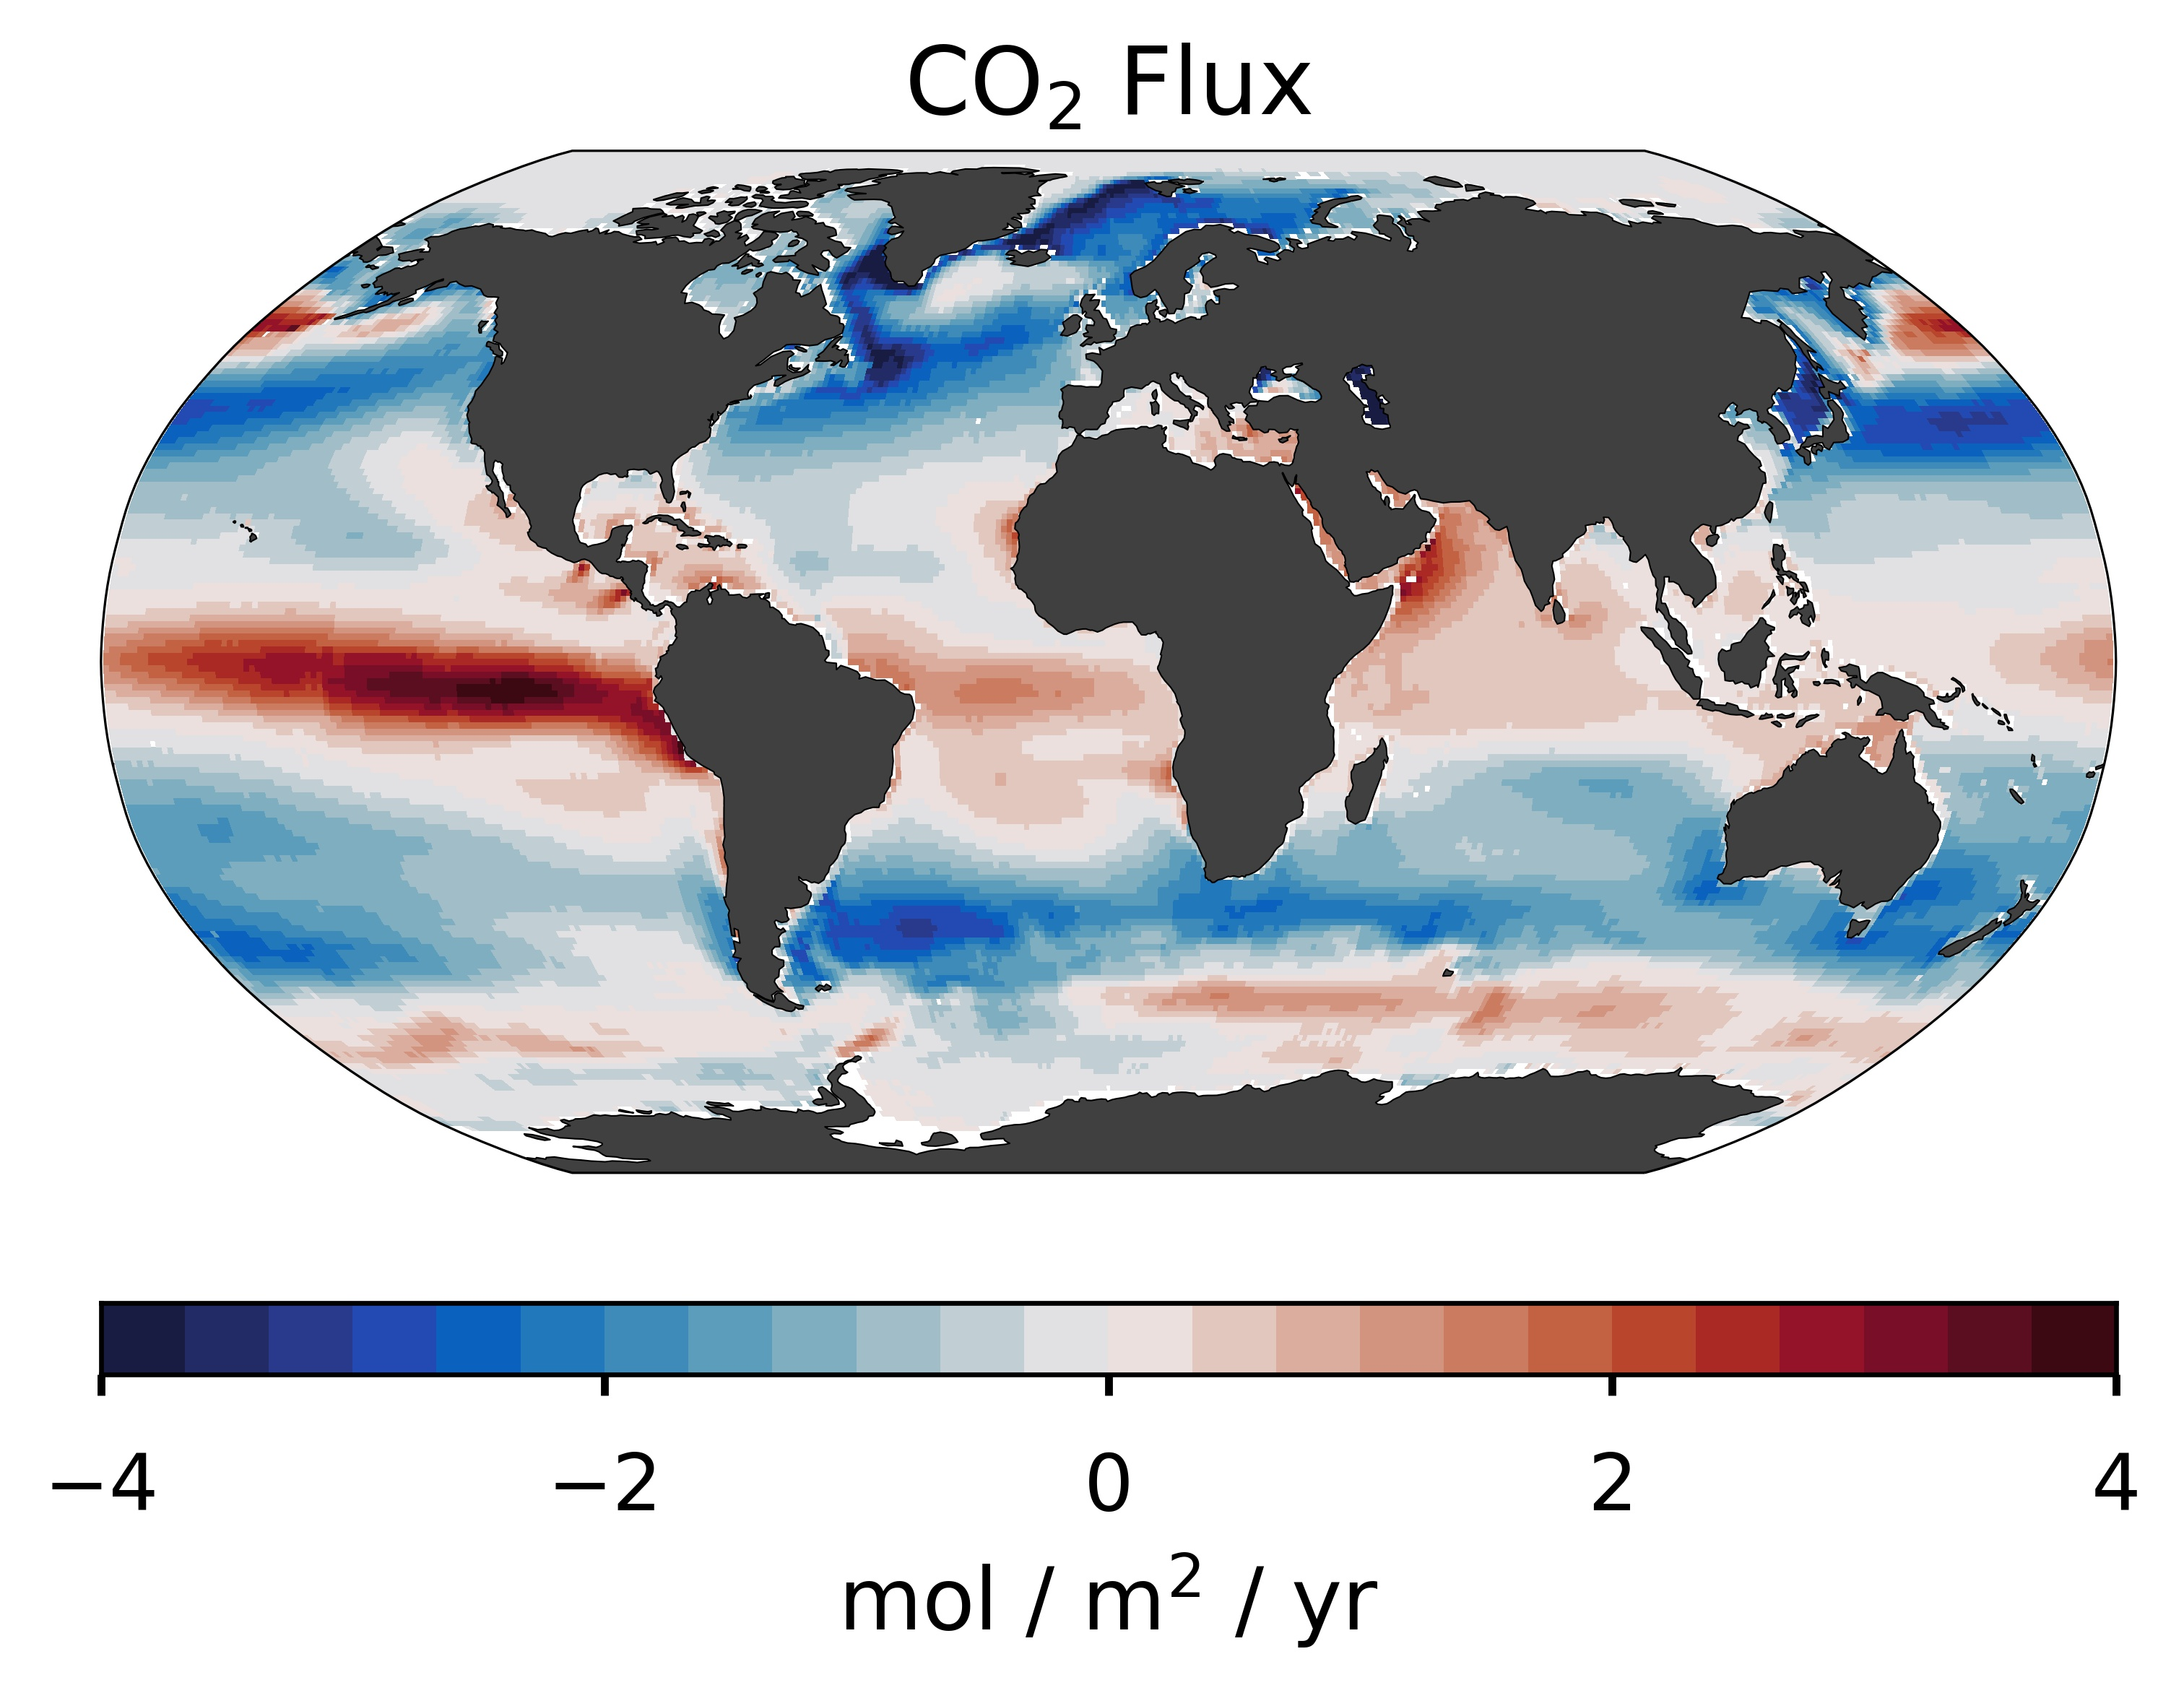

In [5]:
fig_shape = (1,1)
cmap = cm.cm.balance
lab = f'mol / m$^2$ / yr'
vrange = [-4, 4, 25]

with plt.style.context('seaborn-talk'):
    fig = plt.figure(figsize=(6,7))

    ### Mask
    dia = SpatialMap2(nrows_ncols=fig_shape, fig=fig, cbar_location='bottom', cbar_orientation='horizontal')
    data1 = hpd.mean("time")/12.01 # 12 grams per mol
    sub = dia.add_plot(lat = hpd.lat, 
                           lon = hpd.lon, 
                           data = data1, 
                           vrange=vrange, 
                           cmap=cmap, 
                           ax=0)
    dia.set_title(f"CO$_2$ Flux", 0, loc="center")
    col = dia.add_colorbar(sub)
    dia.set_cbar_xlabel(col, lab)
plt.savefig(f"{recon_output_dir}/HPD_Flux_map.eps",format='eps',dpi=1200) 

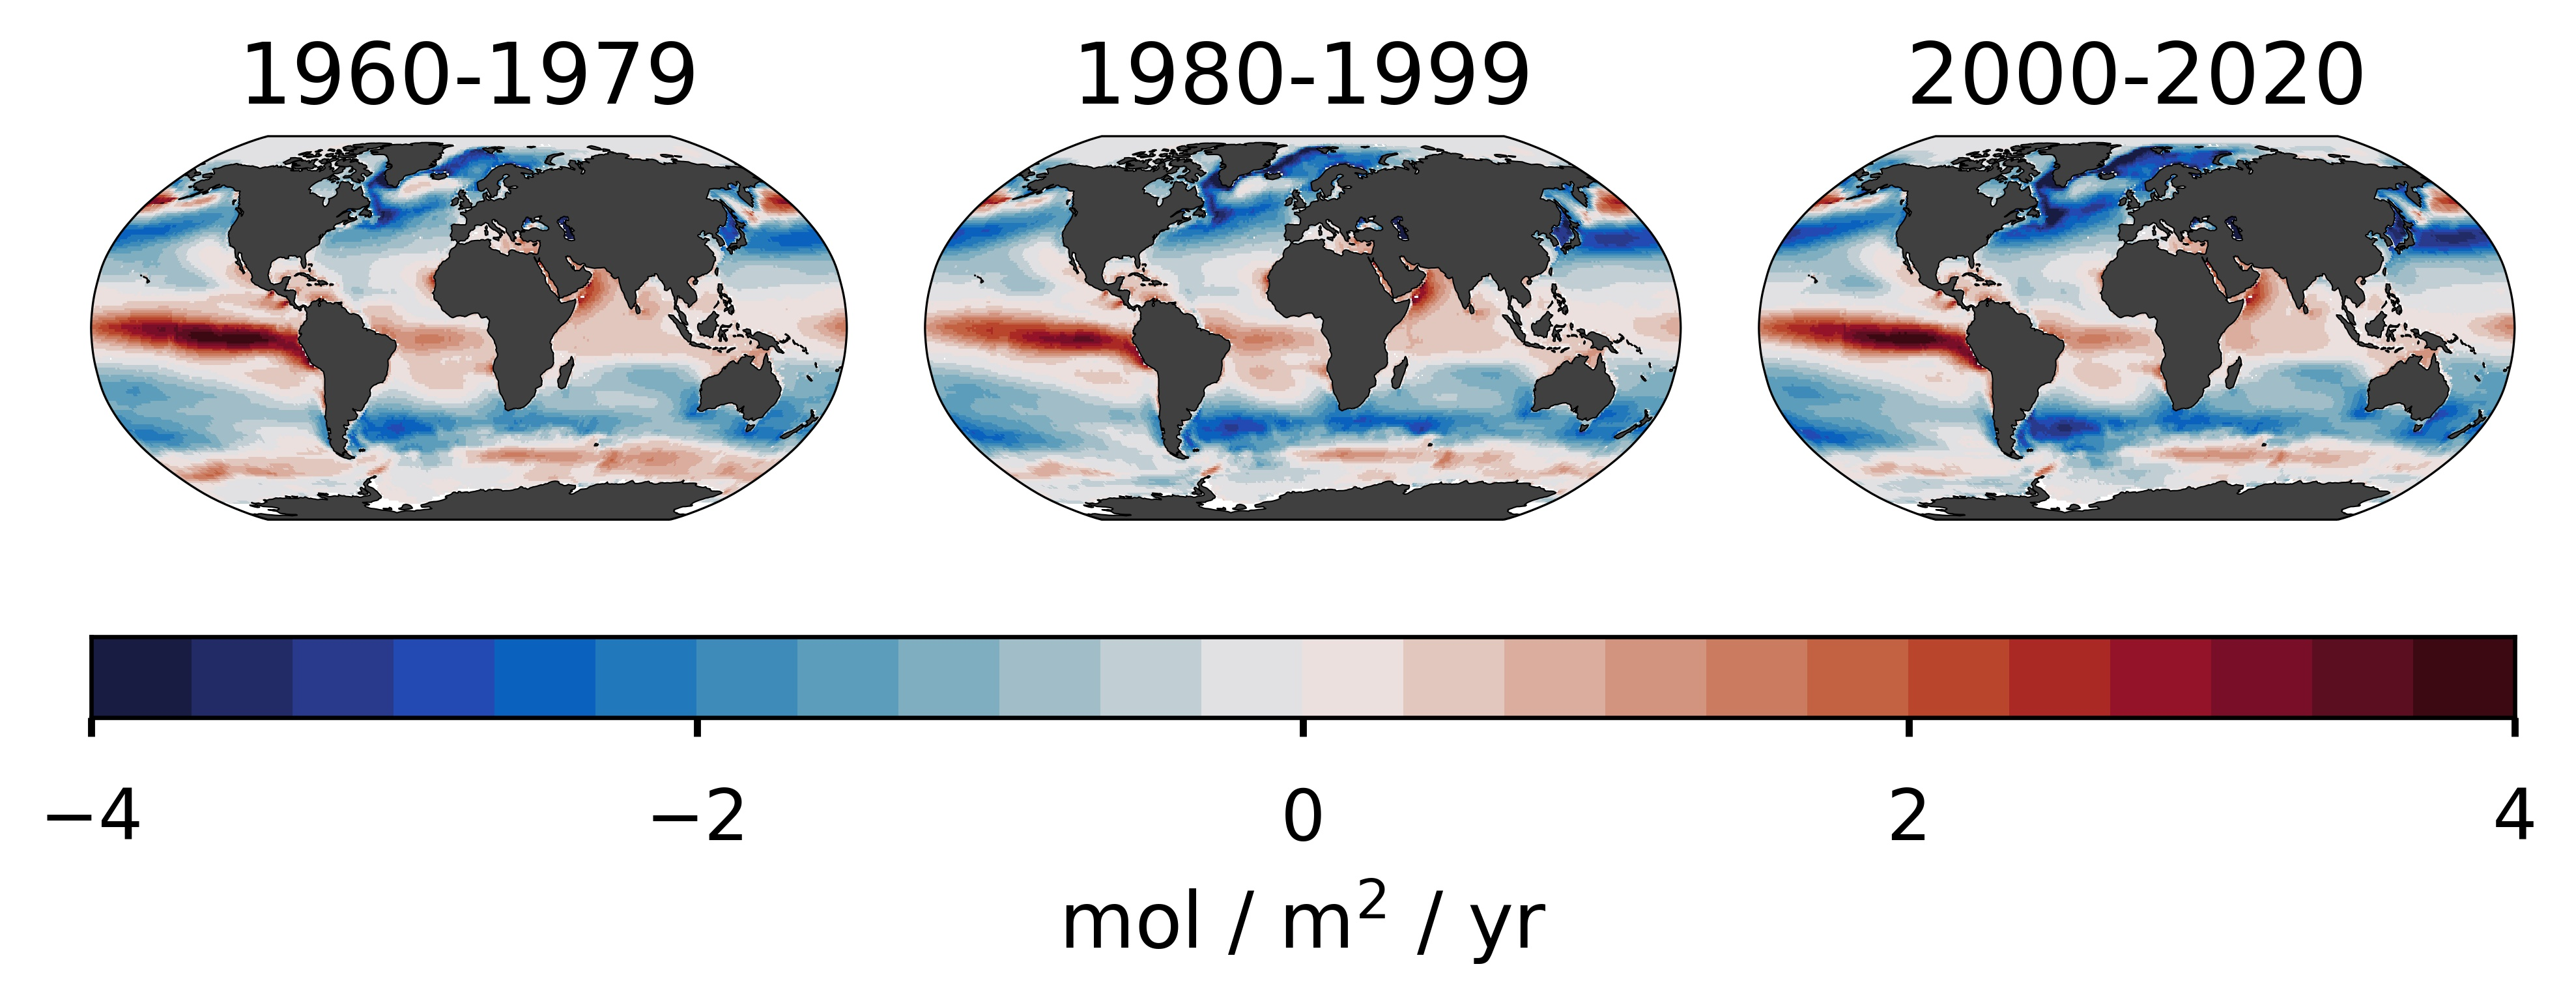

In [6]:
fig_shape = (1,3)
cmap = cm.cm.balance
lab = f'mol / m$^2$ / yr'
vrange = [-4, 4, 25]

with plt.style.context('seaborn-talk'):
    fig = plt.figure(figsize=(8,3))

    ### Mask
    dia = SpatialMap2(nrows_ncols=fig_shape, fig=fig, cbar_location='bottom', cbar_orientation='horizontal')
    data1 = hpd.sel(time=slice("1960-01-01","1979-12-31")).mean("time")/12.01 # 12 grams per mol
    sub = dia.add_plot(lat = hpd.lat, 
                           lon = hpd.lon, 
                           data = data1, 
                           vrange=vrange, 
                           cmap=cmap, 
                           ax=0)
    dia.set_title(f"1960-1979", 0, loc="center")
    
    data1 = hpd.sel(time=slice("1980-01-01","1999-12-31")).mean("time")/12.01 # 12 grams per mol
    sub = dia.add_plot(lat = hpd.lat, 
                           lon = hpd.lon, 
                           data = data1, 
                           vrange=vrange, 
                           cmap=cmap, 
                           ax=1)
    dia.set_title(f"1980-1999", 1, loc="center")
    
    data1 = hpd.sel(time=slice("2000-01-01","2020-12-31")).mean("time")/12.01 # 12 grams per mol
    sub = dia.add_plot(lat = hpd.lat, 
                           lon = hpd.lon, 
                           data = data1, 
                           vrange=vrange, 
                           cmap=cmap, 
                           ax=2)
    dia.set_title(f"2000-2020", 2, loc="center")
    
    col = dia.add_colorbar(sub)
    dia.set_cbar_xlabel(col, lab)
plt.savefig(f"{recon_output_dir}/HPD_Flux_decades_map.eps",format='eps',dpi=1200) 

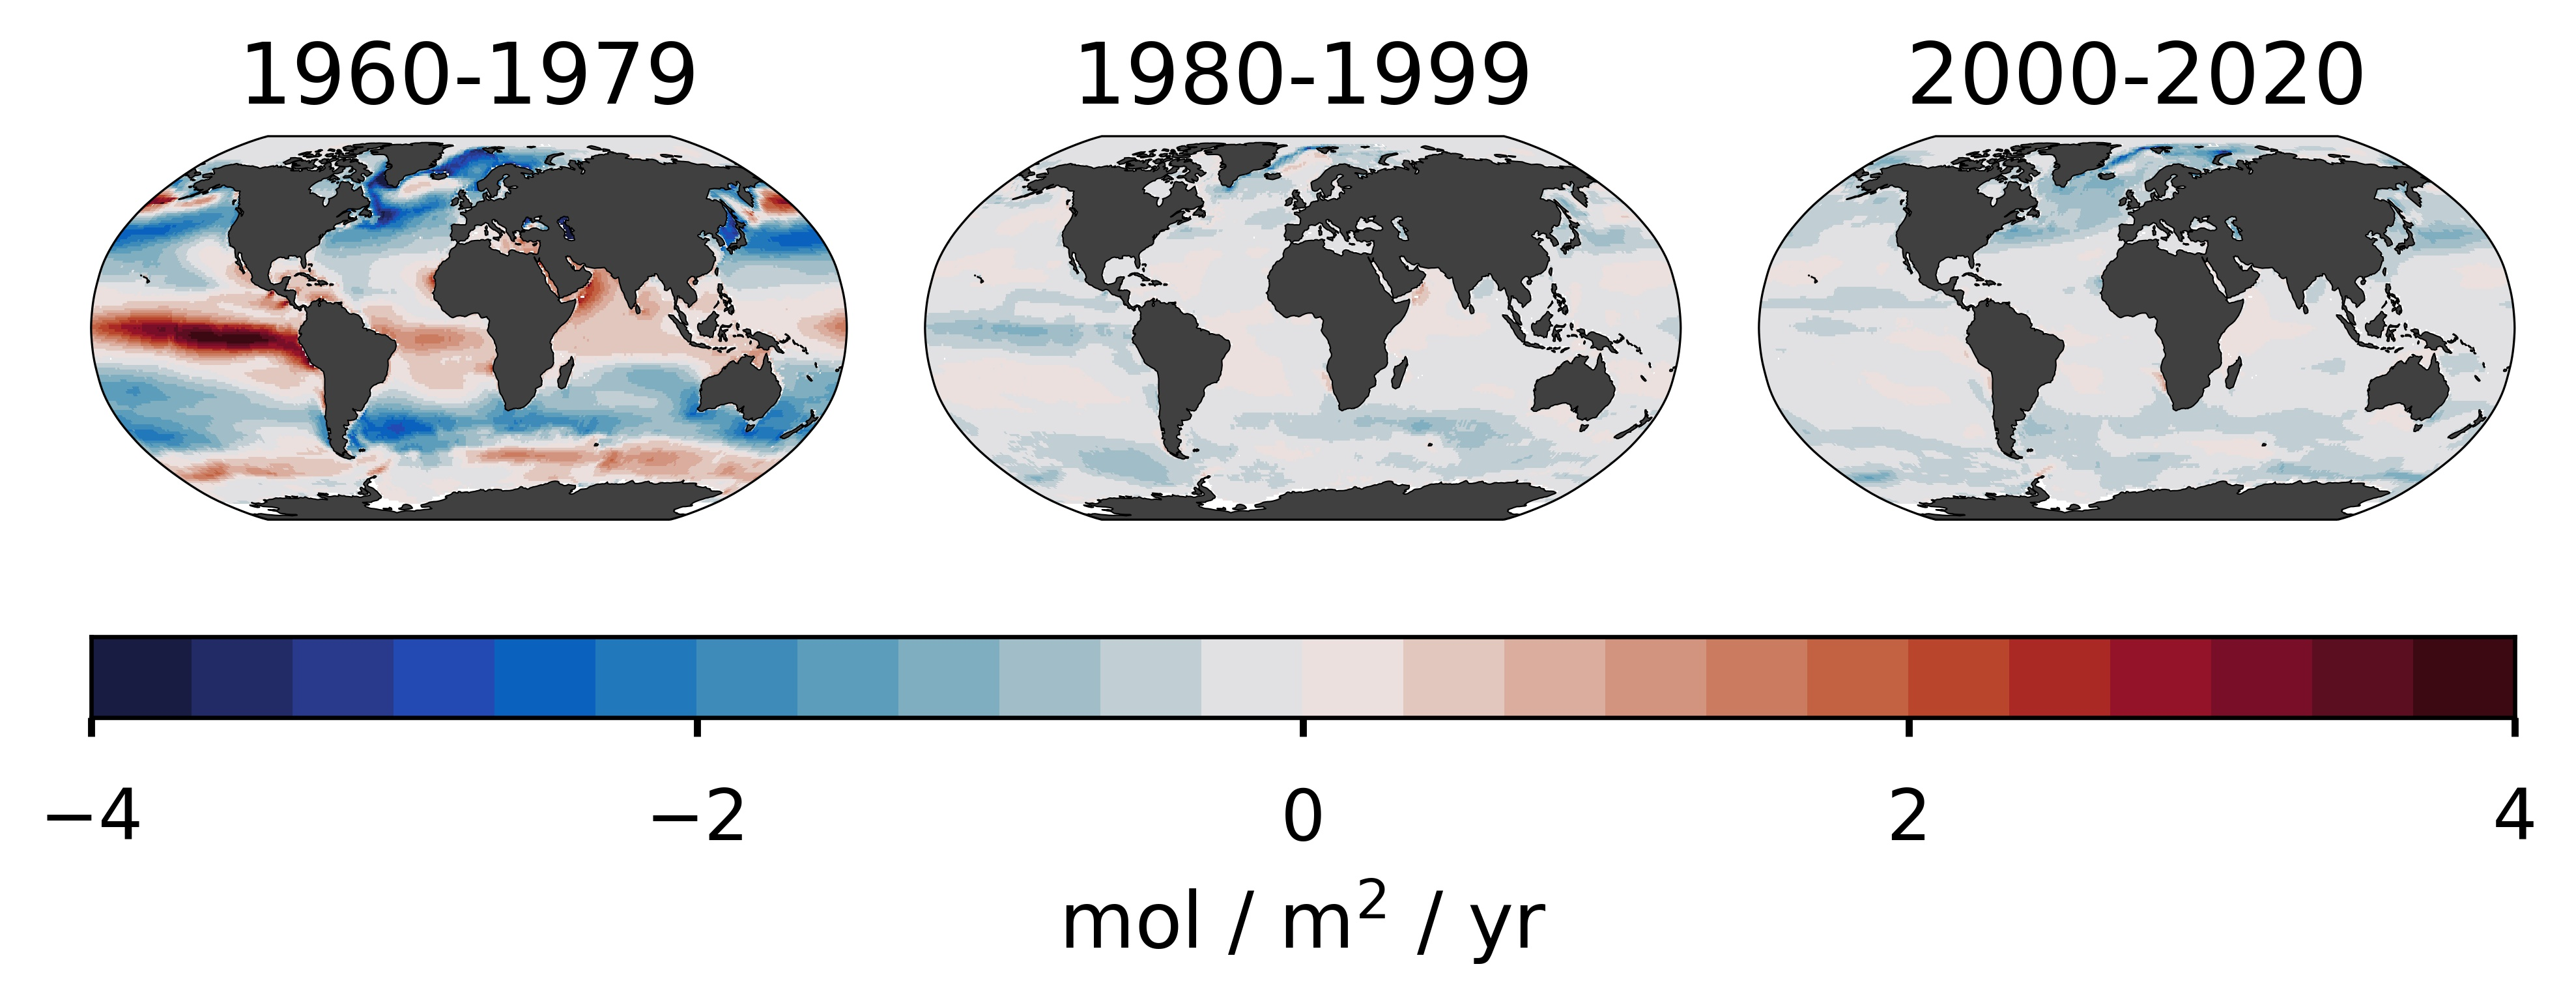

In [7]:
fig_shape = (1,3)
cmap = cm.cm.balance
lab = f'mol / m$^2$ / yr'
vrange = [-4, 4, 25]

with plt.style.context('seaborn-talk'):
    fig = plt.figure(figsize=(8,3))

    ### Mask
    dia = SpatialMap2(nrows_ncols=fig_shape, fig=fig, cbar_location='bottom', cbar_orientation='horizontal')
    data1 = hpd.sel(time=slice("1960-01-01","1979-12-31")).mean("time")/12.01 # 12 grams per mol
    sub = dia.add_plot(lat = hpd.lat, 
                           lon = hpd.lon, 
                           data = data1, 
                           vrange=vrange, 
                           cmap=cmap, 
                           ax=0)
    dia.set_title(f"1960-1979", 0, loc="center")
    
    data1 = hpd.sel(time=slice("1980-01-01","1999-12-31")).mean("time")/12.01-hpd.sel(time=slice("1960-01-01","1979-12-31")).mean("time")/12.01 # 12 grams per mol
    sub = dia.add_plot(lat = hpd.lat, 
                           lon = hpd.lon, 
                           data = data1, 
                           vrange=vrange, 
                           cmap=cmap, 
                           ax=1)
    dia.set_title(f"1980-1999", 1, loc="center")
    
    data1 = hpd.sel(time=slice("2000-01-01","2020-12-31")).mean("time")/12.01-hpd.sel(time=slice("1960-01-01","1979-12-31")).mean("time")/12.01 # 12 grams per mol
    sub = dia.add_plot(lat = hpd.lat, 
                           lon = hpd.lon, 
                           data = data1, 
                           vrange=vrange, 
                           cmap=cmap, 
                           ax=2)
    dia.set_title(f"2000-2020", 2, loc="center")
    
    col = dia.add_colorbar(sub)
    dia.set_cbar_xlabel(col, lab)
plt.savefig(f"{recon_output_dir}/HPD_Flux_decades_change_map.eps",format='eps',dpi=1200) 

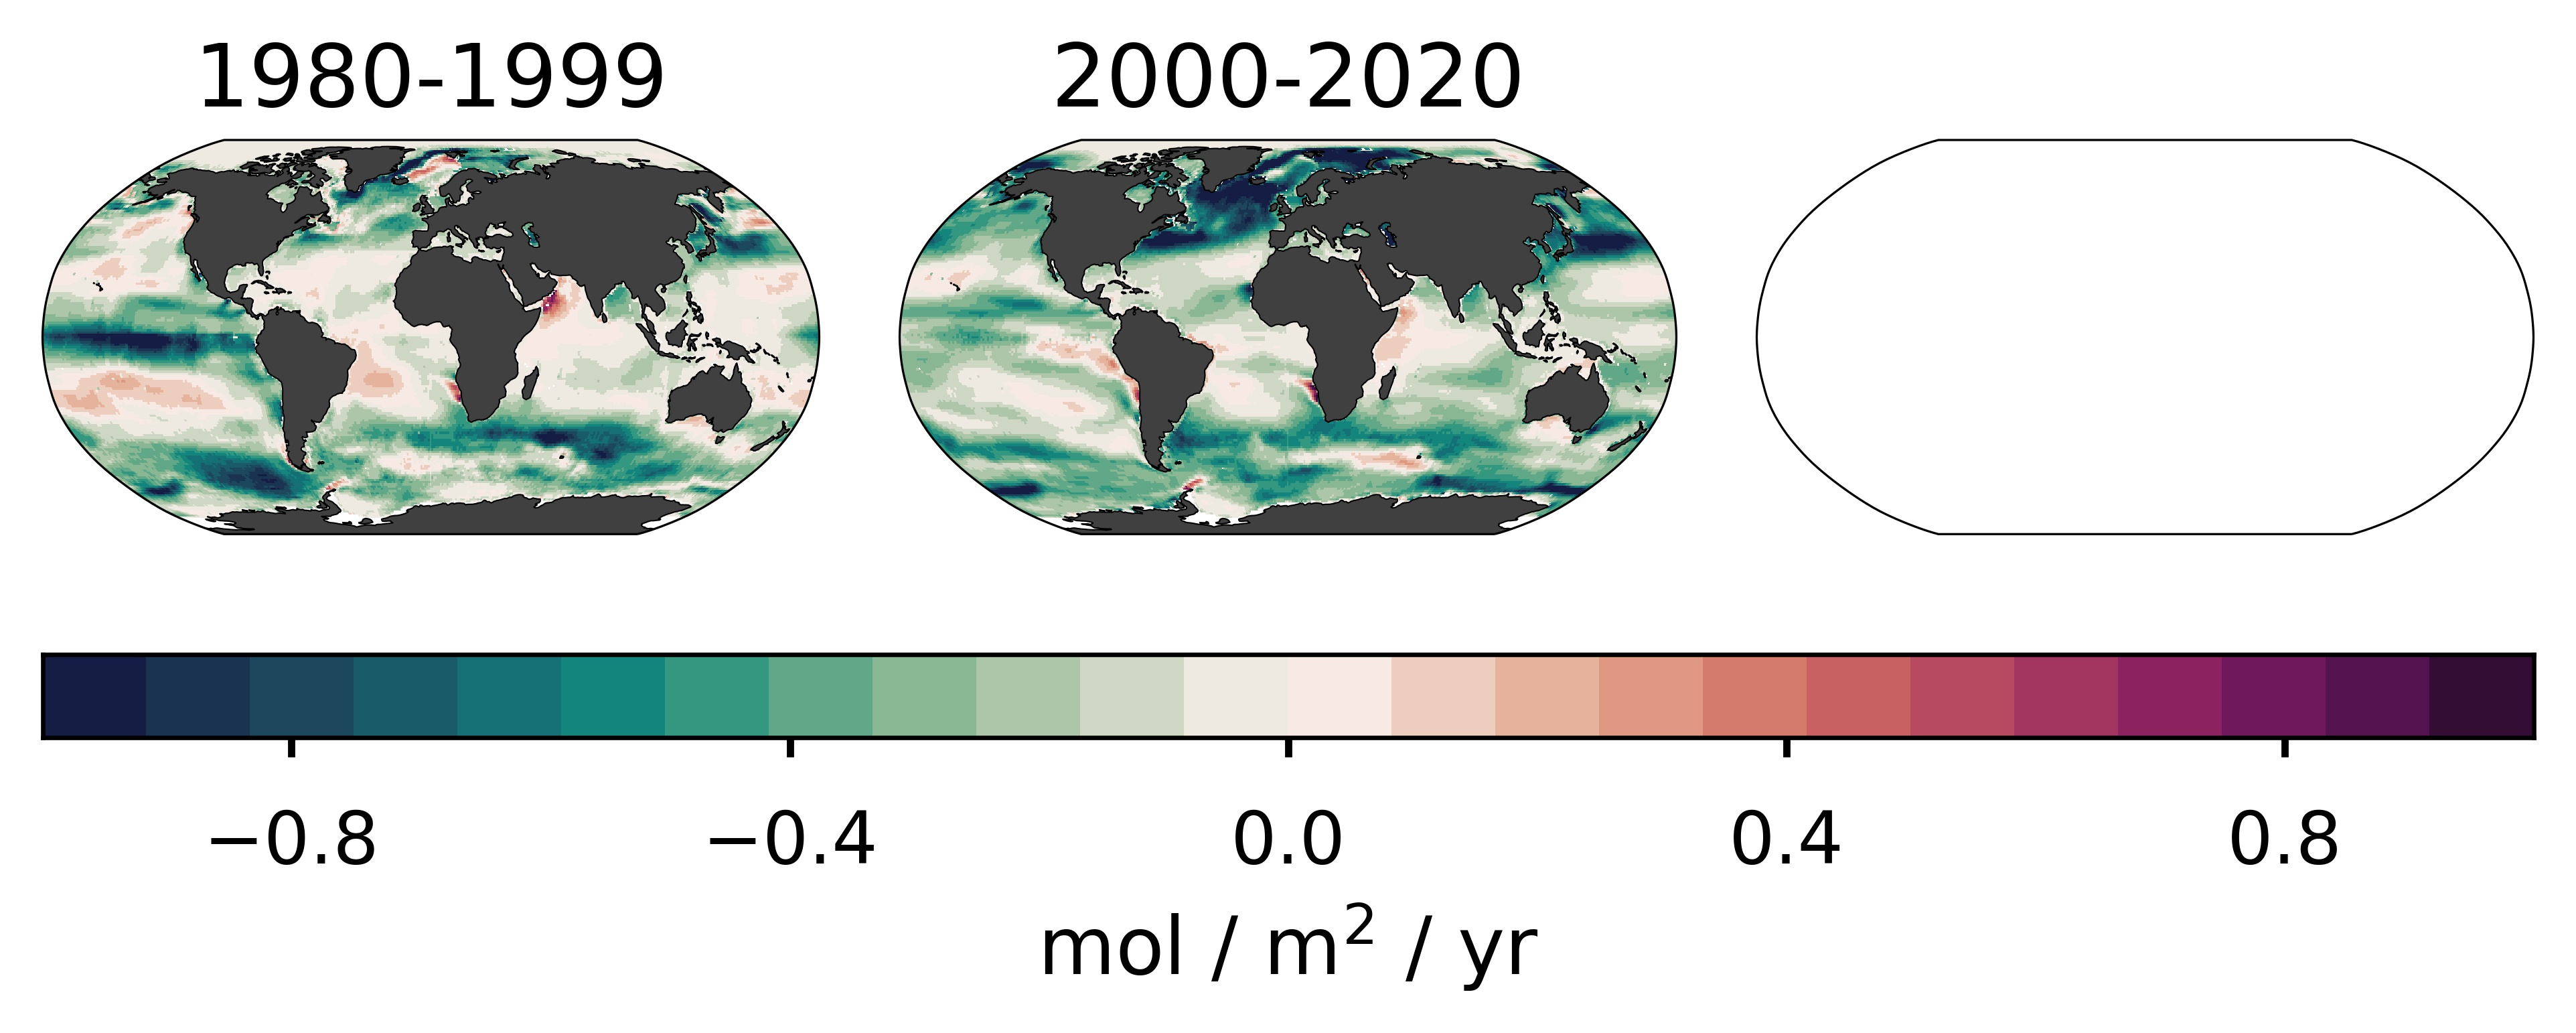

In [8]:
fig_shape = (1,3)
cmap = cm.cm.curl
lab = f'mol / m$^2$ / yr'
vrange = [-1, 1, 25]

with plt.style.context('seaborn-talk'):
    fig = plt.figure(figsize=(8,3))

    ### Mask
    dia = SpatialMap2(nrows_ncols=fig_shape, fig=fig, cbar_location='bottom', cbar_orientation='horizontal')
    
    data1 = hpd.sel(time=slice("1980-01-01","1999-12-31")).mean("time")/12.01-hpd.sel(time=slice("1960-01-01","1979-12-31")).mean("time")/12.01 # 12 grams per mol
    sub = dia.add_plot(lat = hpd.lat, 
                           lon = hpd.lon, 
                           data = data1, 
                           vrange=vrange, 
                           cmap=cmap, 
                           ax=0)
    dia.set_title(f"1980-1999", 0, loc="center")
    
    data1 = hpd.sel(time=slice("2000-01-01","2020-12-31")).mean("time")/12.01-hpd.sel(time=slice("1960-01-01","1979-12-31")).mean("time")/12.01 # 12 grams per mol
    sub = dia.add_plot(lat = hpd.lat, 
                           lon = hpd.lon, 
                           data = data1, 
                           vrange=vrange, 
                           cmap=cmap, 
                           ax=1)
    dia.set_title(f"2000-2020", 1, loc="center")
    
    col = dia.add_colorbar(sub)
    dia.set_cbar_xlabel(col, lab)
plt.savefig(f"{recon_output_dir}/HPD_Flux_decades_changes_map.eps",format='eps',dpi=1200) 

In [9]:
## Load Biomes so we can separate by Basin
bfile = '/data/artemis/observations/Biomes_FayMcKinley/Time_Varying_Biomes.nc'
BIOMES = xr.load_dataset(f"{bfile}")
BIOMES = BIOMES.transpose('year','lat','lon')

In [ ]:
# Pacific = 1, 2, 3, 4, 5, 6, 7
# Atlantic 8, 9, 10, 11, 12, 13
# Southern Ocean = 15, 16, 17
# Indian = 14

In [10]:
# Only look at open ocean:
mask = xr.open_dataset('/data/artemis/observations/SOCOM/extra_files/RECCAP2_region_masks_all.nc') 
#replace longitude from 0-360 to -180 to 180
mask['lon'] = list(map(lambda x: x-360 if x>180 else x, mask['lon'].values))
# Sort by longitude
mask = mask.sortby('lon')

fk = xr.open_dataset('/data/artemis/observations/SOCOM/extra_files/FluxKit_calculation_1982-2019_v20201120.nc')

In [11]:
zonal_pacific = ((hpd.where(((mask['open_ocean']>=1) & (BIOMES.MeanBiomes < 8)))*(fk.area)).sum(['lon']).groupby("time.year").mean("time")) # g/degree/yr
zonal_atlantic = ((hpd.where(((mask['open_ocean']>=1) & (BIOMES.MeanBiomes > 7) & (BIOMES.MeanBiomes < 14)))*(fk.area)).sum(['lon']).groupby("time.year").mean("time")) # g/degree/yr
zonal_southern = ((hpd.where(((mask['open_ocean']>=1) & (BIOMES.MeanBiomes > 14)))*(fk.area)).sum(['lon']).groupby("time.year").mean("time")) # g/degree/yr
zonal_indian = ((hpd.where(((mask['open_ocean']>=1) & (BIOMES.MeanBiomes == 14)))*(fk.area)).sum(['lon']).groupby("time.year").mean("time")) # g/degree/yr      

In [12]:
z_pacific = (zonal_pacific.transpose()-zonal_pacific.mean("year").transpose())/10**12
z_atlantic = (zonal_atlantic.transpose()-zonal_atlantic.mean("year").transpose())/10**12
z_indian = (zonal_indian.transpose()-zonal_indian.mean("year").transpose())/10**12
z_southern = (zonal_southern.transpose()-zonal_southern.mean("year").transpose())/10**12

z_pacific = np.where(z_pacific>12,12,z_pacific)
z_pacific = np.where(z_pacific<-12,-12,z_pacific)

z_atlantic = np.where(z_atlantic>12,12,z_atlantic)
z_atlantic = np.where(z_atlantic<-12,-12,z_atlantic)

z_indian = np.where(z_indian>12,12,z_indian)
z_indian = np.where(z_indian<-12,-12,z_indian)

z_southern = np.where(z_southern>12,12,z_southern)
z_southern = np.where(z_southern<-12,-12,z_southern)

## Hovmoller Diagrams

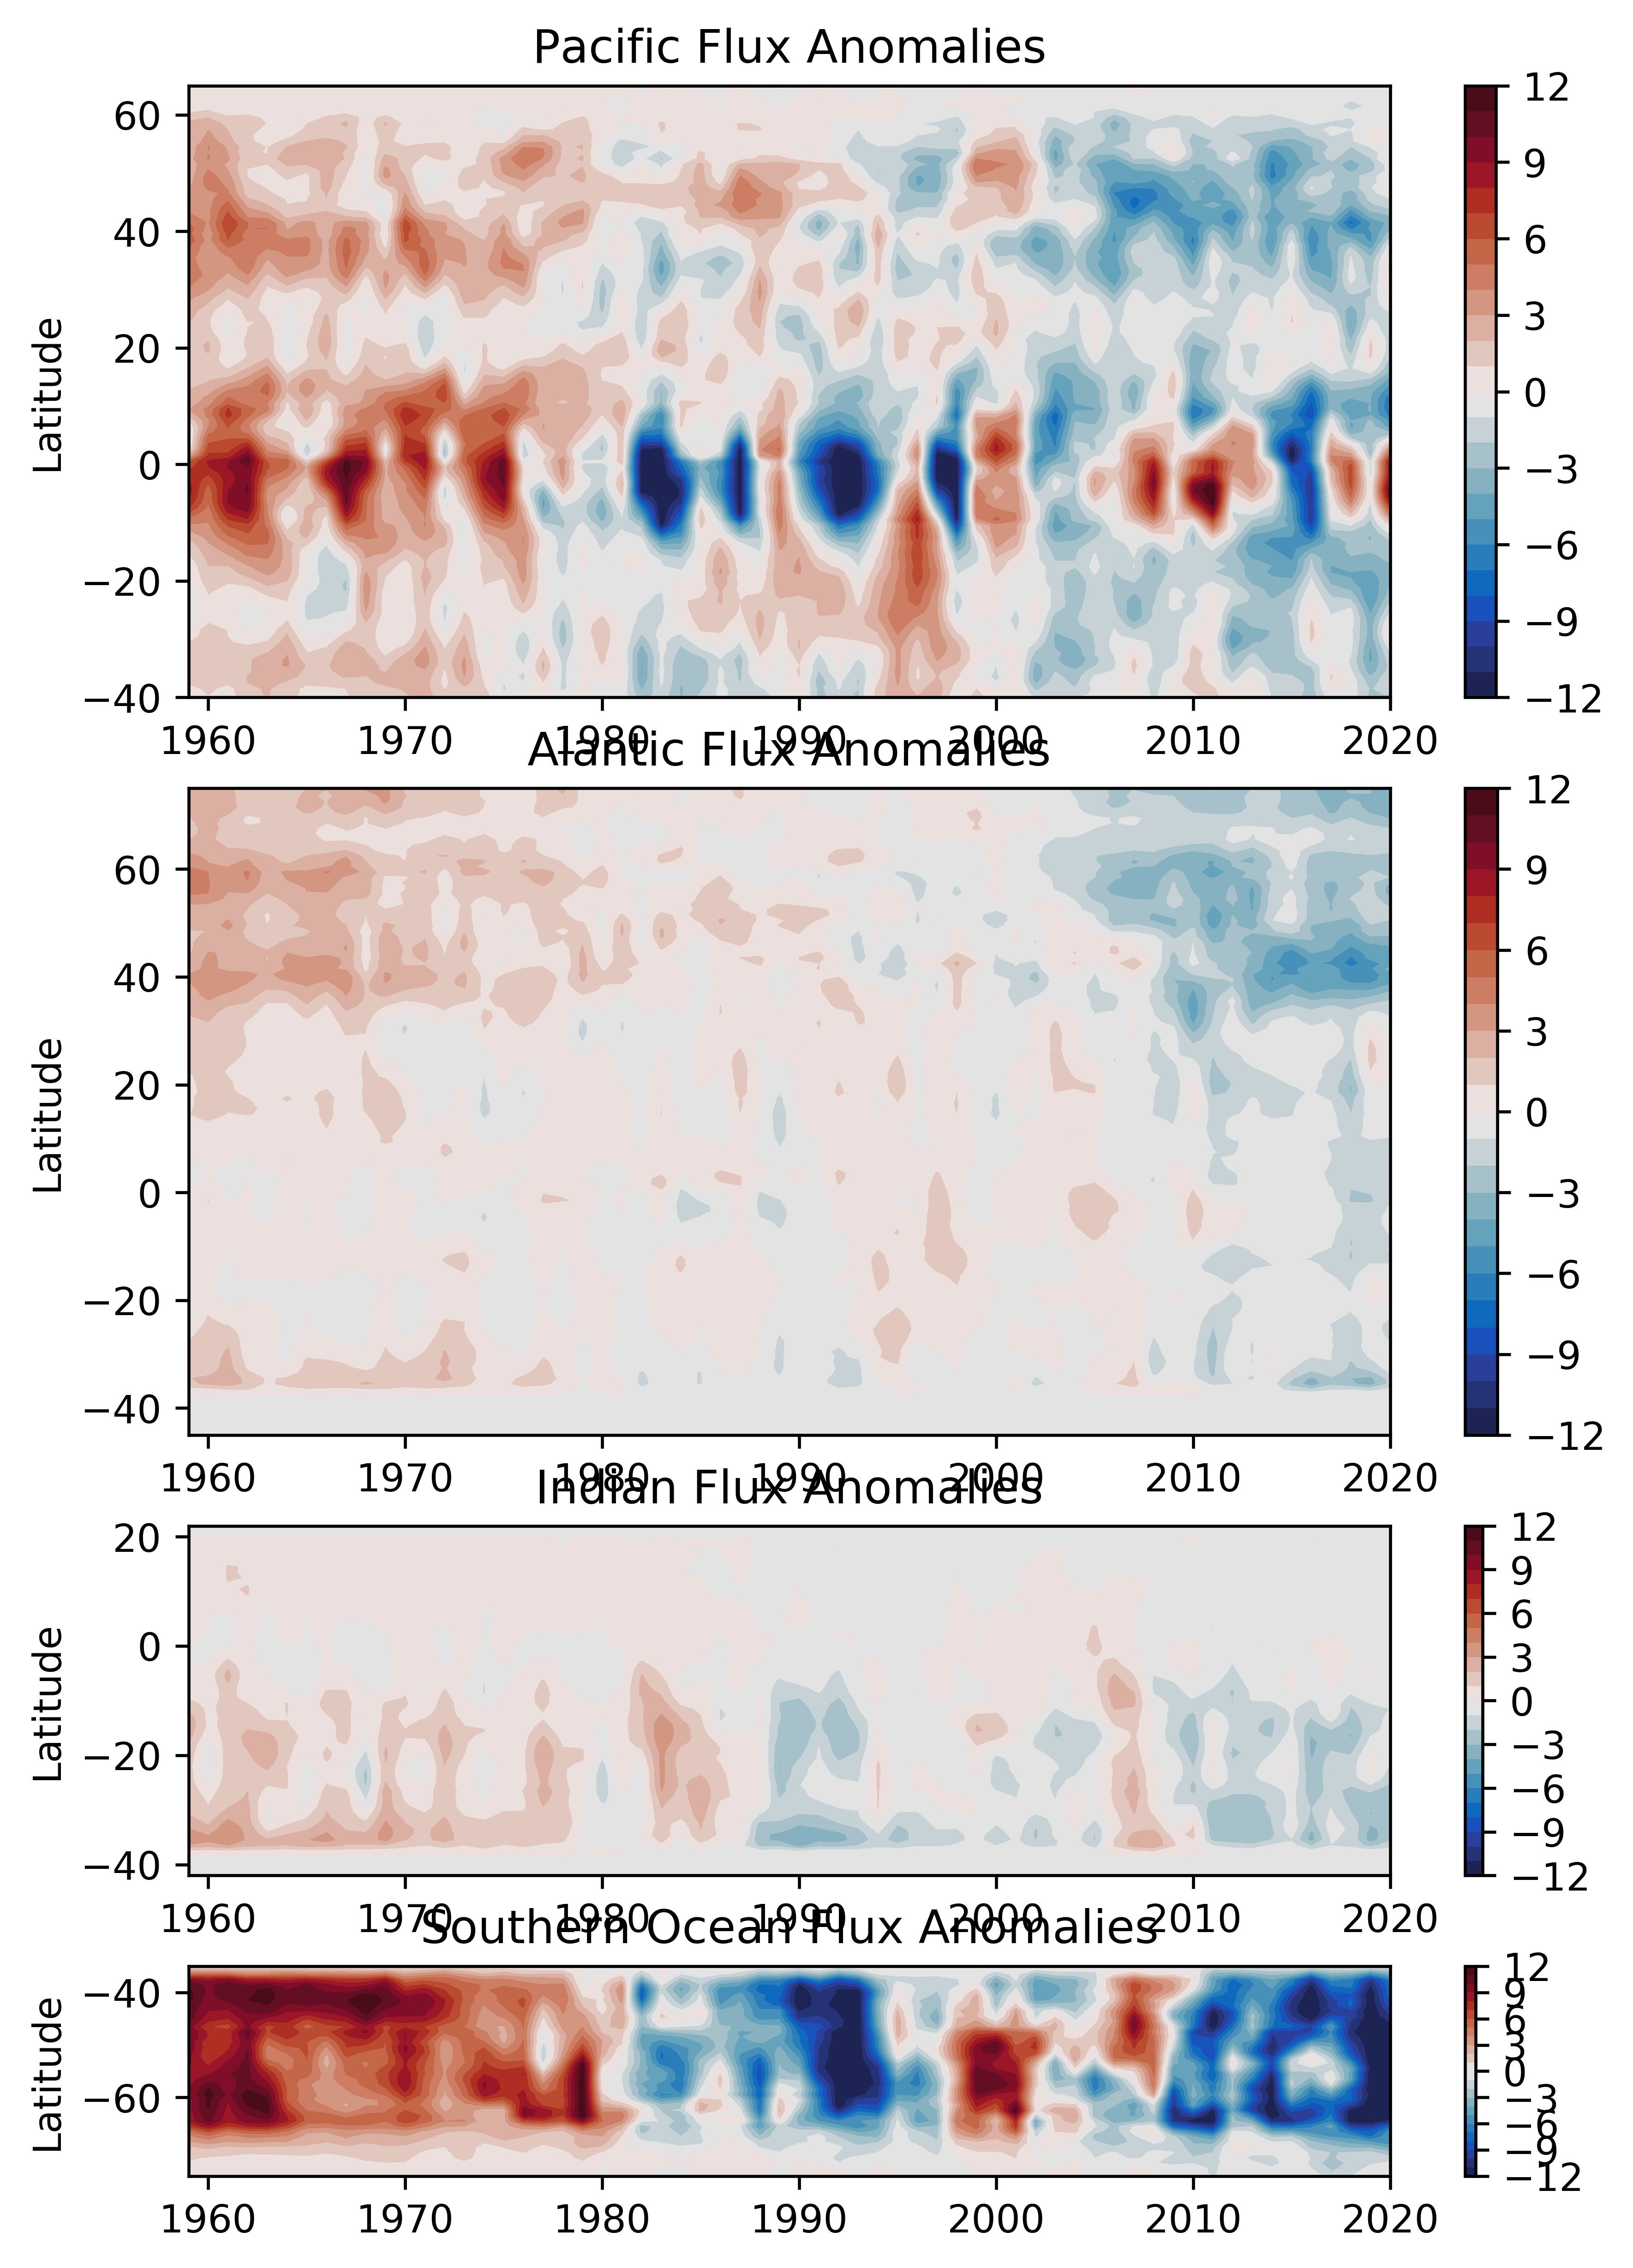

In [13]:
# Make Like Landschutzer's plot
#########
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
########################################


fig, axs = plt.subplots(4, 1, figsize=(7,10), gridspec_kw={'height_ratios': [1.75, 1.85, 1, 0.6]})


x0=axs[0].contourf(zonal_pacific.year,zonal_pacific.lat,z_pacific,levels=np.linspace(-12,12,25), cmap=cm.cm.balance)
plt.colorbar(x0,ax=axs[0])
axs[0].set_ylim(-40,65)
axs[0].set_title("Pacific Flux Anomalies")
axs[0].set_ylabel("Latitude")

x1=axs[1].contourf(zonal_pacific.year,zonal_pacific.lat,z_atlantic,levels=np.linspace(-12,12,25), cmap=cm.cm.balance)
plt.colorbar(x1,ax=axs[1])
axs[1].set_ylim(-45,75)
axs[1].set_title("Alantic Flux Anomalies")
axs[1].set_ylabel("Latitude")

x2=axs[2].contourf(zonal_pacific.year,zonal_pacific.lat,z_indian,levels=np.linspace(-12,12,25), cmap=cm.cm.balance)
plt.colorbar(x2,ax=axs[2])
axs[2].set_ylim(-42,22)
axs[2].set_title("Indian Flux Anomalies")
axs[2].set_ylabel("Latitude")

x3=axs[3].contourf(zonal_pacific.year,zonal_pacific.lat,z_southern,levels=np.linspace(-12,12,25), cmap=cm.cm.balance)
plt.colorbar(x3,ax=axs[3])
axs[3].set_ylim(-75,-35)
axs[3].set_title("Southern Ocean Flux Anomalies")
axs[3].set_ylabel("Latitude")

plt.savefig(f"{recon_output_dir}/Basin_Flux_Anomalies_Hov_sized.eps",format='eps',dpi=600)

## Detrended CO2 Flux Anomalies

In [14]:
from scipy import signal
detrended_co2_flux = signal.detrend(hpd.groupby("time.year").mean("time").where(~np.isnan(hpd.groupby("time.year").mean("time")),0),axis=0,type='linear')

In [15]:
dt_co2_flux = xr.DataArray(data=detrended_co2_flux,
...     dims=["year", "lat", "lon"],
...     coords=dict(
...         lon=(["lon"], hpd.lon),
...         lat=(["lat"], hpd.lat),
...         time=hpd.groupby("time.year").mean("time").year))

In [16]:
dt_zonal_pacific = ((dt_co2_flux.where(((mask['open_ocean']>=1) & (BIOMES.MeanBiomes < 8)))*(fk.area)).sum(['lon'])) # g/degree/yr
dt_zonal_atlantic = ((dt_co2_flux.where(((mask['open_ocean']>=1) & (BIOMES.MeanBiomes > 7) & (BIOMES.MeanBiomes < 14)))*(fk.area)).sum(['lon'])) # g/degree/yr
dt_zonal_southern = ((dt_co2_flux.where(((mask['open_ocean']>=1) & (BIOMES.MeanBiomes > 14)))*(fk.area)).sum(['lon'])) # g/degree/yr
dt_zonal_indian = ((dt_co2_flux.where(((mask['open_ocean']>=1) & (BIOMES.MeanBiomes == 14)))*(fk.area)).sum(['lon'])) # g/degree/yr      

dt_pacific_anoms = (dt_zonal_pacific.transpose()-dt_zonal_pacific.mean("year").transpose())/10**12
dt_atlantic_anoms = (dt_zonal_atlantic.transpose()-dt_zonal_atlantic.mean("year").transpose())/10**12
dt_indian_anoms = (dt_zonal_indian.transpose()-dt_zonal_indian.mean("year").transpose())/10**12
dt_south_anoms = (dt_zonal_southern.transpose()-dt_zonal_southern.mean("year").transpose())/10**12

# Mask large values so they show up on plot:
dt_pacific_anoms = dt_pacific_anoms.where(dt_pacific_anoms<10,10).where(dt_pacific_anoms>-10,-10)
dt_atlantic_anoms = dt_atlantic_anoms.where(dt_atlantic_anoms<10,10).where(dt_atlantic_anoms>-10,-10)
dt_indian_anoms = dt_indian_anoms.where(dt_indian_anoms<10,10).where(dt_indian_anoms>-10,-10)
dt_south_anoms = dt_south_anoms.where(dt_south_anoms<10,10).where(dt_south_anoms>-10,-10)

In [17]:
dt_pacific_anoms.year.time

<xarray.DataArray 'time' (year: 62)>
array([1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
       1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020])
Coordinates:
    time     (year) int64 1959 1960 1961 1962 1963 ... 2016 2017 2018 2019 2020
Dimensions without coordinates: year

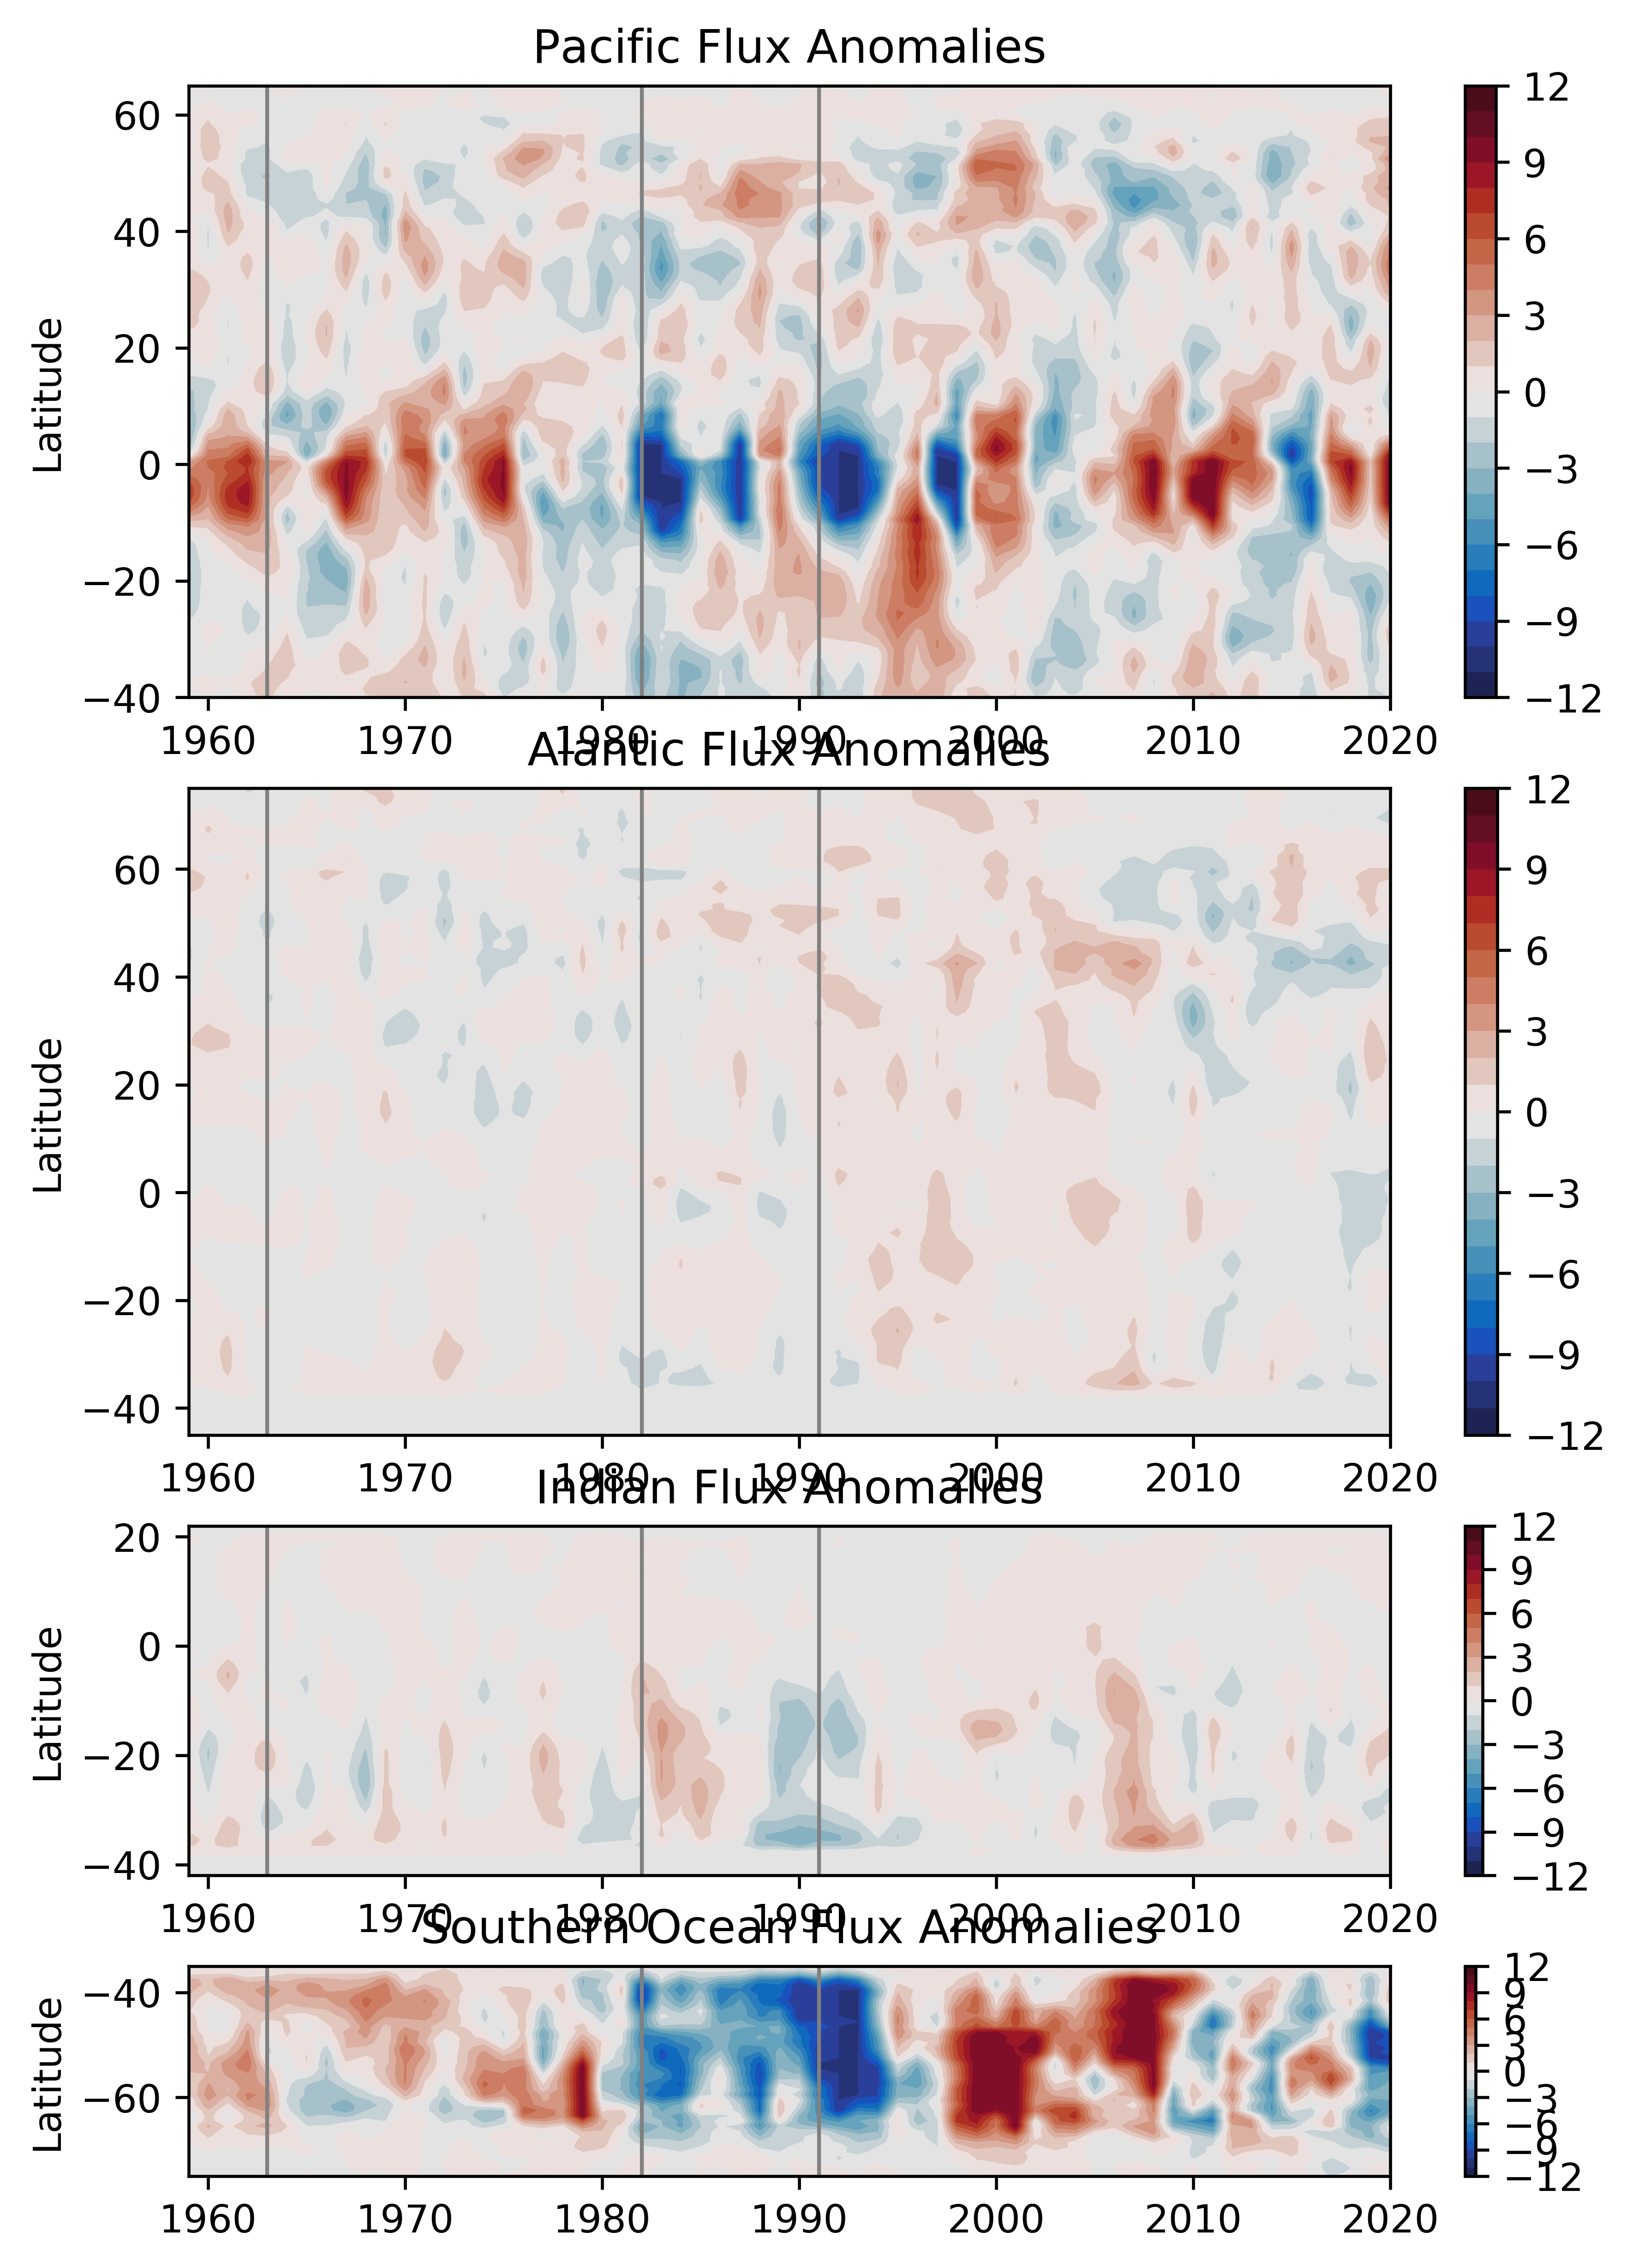

In [18]:
# Make Like Landschutzer's plot
#########
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
########################################


fig, axs = plt.subplots(4, 1, figsize=(7,10), gridspec_kw={'height_ratios': [1.75, 1.85, 1, 0.6]})


x0=axs[0].contourf(dt_pacific_anoms.year.time,dt_pacific_anoms.lat,dt_pacific_anoms,levels=np.linspace(-12,12,25), cmap=cm.cm.balance)
plt.colorbar(x0,ax=axs[0])
axs[0].set_ylim(-40,65)
axs[0].axvline(x=1963,color='grey',linewidth=1)
axs[0].axvline(x=1982,color='grey',linewidth=1)
axs[0].axvline(x=1991,color='grey',linewidth=1)
axs[0].set_title("Pacific Flux Anomalies")
axs[0].set_ylabel("Latitude")

x1=axs[1].contourf(dt_atlantic_anoms.year.time,dt_atlantic_anoms.lat,dt_atlantic_anoms,levels=np.linspace(-12,12,25), cmap=cm.cm.balance)
plt.colorbar(x1,ax=axs[1])
axs[1].set_ylim(-45,75)
axs[1].axvline(x=1963,color='grey',linewidth=1)
axs[1].axvline(x=1982,color='grey',linewidth=1)
axs[1].axvline(x=1991,color='grey',linewidth=1)
axs[1].set_title("Alantic Flux Anomalies")
axs[1].set_ylabel("Latitude")

x2=axs[2].contourf(dt_indian_anoms.year.time,dt_indian_anoms.lat,dt_indian_anoms,levels=np.linspace(-12,12,25), cmap=cm.cm.balance)
plt.colorbar(x2,ax=axs[2])
axs[2].axvline(x=1963,color='grey',linewidth=1)
axs[2].axvline(x=1982,color='grey',linewidth=1)
axs[2].axvline(x=1991,color='grey',linewidth=1)
axs[2].set_ylim(-42,22)
axs[2].set_title("Indian Flux Anomalies")
axs[2].set_ylabel("Latitude")

x3=axs[3].contourf(dt_south_anoms.year.time,dt_south_anoms.lat,dt_south_anoms,levels=np.linspace(-12,12,25), cmap=cm.cm.balance)
plt.colorbar(x3,ax=axs[3])
axs[3].axvline(x=1963,color='grey',linewidth=1)
axs[3].axvline(x=1982,color='grey',linewidth=1)
axs[3].axvline(x=1991,color='grey',linewidth=1)
axs[3].set_ylim(-75,-35)
axs[3].set_title("Southern Ocean Flux Anomalies")
axs[3].set_ylabel("Latitude")

plt.savefig(f"{recon_output_dir}/Detrended_Basin_Flux_Anomalies_Hov_sized.eps",format='eps',dpi=600)